In [447]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#models
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import imblearn.over_sampling


#scoring
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix


In [448]:
df = pd.read_csv("FINAL.csv")

/Users/elizabethoriordan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [449]:
df.shape

(48827, 71)

In [450]:
df.id.nunique()

17814

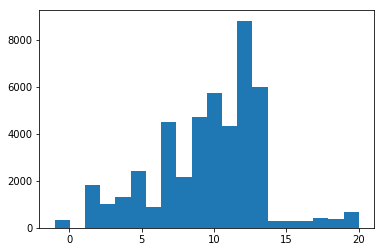

In [451]:
plt.hist(df[df["SCORE"]<21]["SCORE"],bins=20);

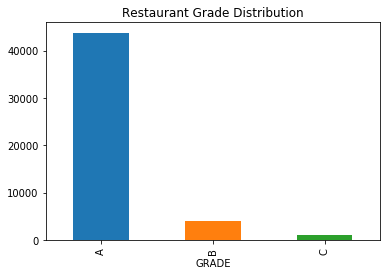

In [452]:
df.groupby("GRADE")["CAMIS"].count().plot(kind="bar")
plt.title("Restaurant Grade Distribution");

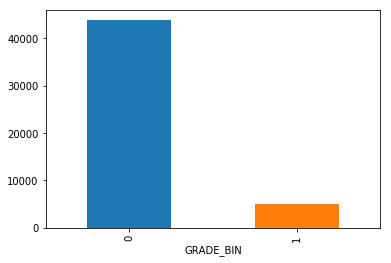

In [453]:
df.groupby("GRADE_BIN")["CAMIS"].count().plot(kind="bar")

In [454]:
df.groupby("GRADE")["CAMIS"].count()

GRADE
A    43763
B     4020
C     1044
Name: CAMIS, dtype: int64

In [455]:
print("% A: ", (43763/(43763+4020+1044)))

% A:  0.896286890449956


In [456]:
df.drop("Unnamed: 0",axis=1, inplace=True)

In [457]:
pd.set_option('display.max_columns', 500)

In [458]:
df.fillna(0, inplace=True)

In [459]:
list(df.columns)

['CAMIS',
 'DBA',
 'BORO',
 'BUILDING',
 'STREET',
 'ZIPCODE',
 'PHONE',
 'CUISINE DESCRIPTION',
 'INSPECTION DATE',
 'ACTION',
 'VIOLATION CODE',
 'VIOLATION DESCRIPTION',
 'CRITICAL FLAG',
 'SCORE',
 'GRADE',
 'GRADE DATE',
 'RECORD DATE',
 'INSPECTION TYPE',
 'address',
 'id',
 'categories',
 'coordinates',
 'hours',
 'image_url',
 'is_closed',
 'photos',
 'price',
 'rating',
 'review_count',
 'transactions',
 'INSPECTION_DATE_FORMAT',
 'INSPECTION_MONTH',
 'INSPECTION_YEAR',
 'PRICE_NUM',
 'GRADE MONTH',
 'GRADE YEAR',
 'LAT',
 'LONG',
 'BRONX',
 'BROOKLYN',
 'MANHATTAN',
 'QUEENS',
 'STATEN ISLAND',
 '<$25K',
 '$25K-$50K',
 '$50K-$75K',
 '$75K-$100K',
 '$100K-$200K',
 '$200K+',
 'TOTAL',
 'Perc_$25K',
 'Perc_$50K',
 'Perc_$75K',
 'Perc_$100K',
 'Perc_$200K',
 'Perc_+$200K',
 'CHAIN',
 'OPEN',
 'CLOSE',
 'DAY',
 'CUISINE_COMP',
 'CUISINE_FREQ',
 'GRADE_BIN',
 'RICH',
 'POOR',
 'BAD_SCORE',
 'RAT_INSPEC',
 'CUISINE_COMP_x',
 'CUISINE_COMP_y',
 'Perc_Total']

In [66]:
x_plot = df[["SCORE",'rating',
 'review_count',"INSPECTION_MONTH", "INSPECTION_YEAR", "PRICE_NUM", 'Perc_$25K',
 'Perc_$50K',
 'Perc_$75K',
 'Perc_$100K',
 'Perc_$200K',
 'Perc_+$200K',
 'CHAIN','OPEN',
 'CLOSE',
 'DAY','GRADE_BIN',
 'RICH',
 'POOR',
 'BAD_SCORE', "GRADE_BIN"]]

Text(29.4494,0.5,'# Reviews')

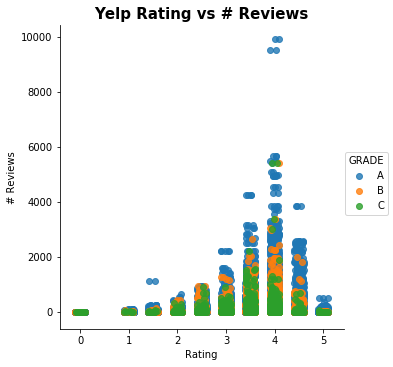

In [256]:
sns.lmplot( x="rating", y="review_count", data=df, fit_reg=False, hue='GRADE', legend=True, x_jitter=.1)
plt.title("Yelp Rating vs # Reviews", weight="bold", size=15)
plt.xlabel("Rating")
plt.ylabel("# Reviews")


In [460]:
df.loc[df["DBA"] == "MCDONALD'S", "CHAIN"] = True
df.loc[df["DBA"] == "KENNEDY FRIED CHICKEN", "CHAIN"] = True

## Set Up Train Test Split

In [70]:
list(df.columns)

['CAMIS',
 'DBA',
 'BORO',
 'BUILDING',
 'STREET',
 'ZIPCODE',
 'PHONE',
 'CUISINE DESCRIPTION',
 'INSPECTION DATE',
 'ACTION',
 'VIOLATION CODE',
 'VIOLATION DESCRIPTION',
 'CRITICAL FLAG',
 'SCORE',
 'GRADE',
 'GRADE DATE',
 'RECORD DATE',
 'INSPECTION TYPE',
 'address',
 'id',
 'categories',
 'coordinates',
 'hours',
 'image_url',
 'is_closed',
 'photos',
 'price',
 'rating',
 'review_count',
 'transactions',
 'INSPECTION_DATE_FORMAT',
 'INSPECTION_MONTH',
 'INSPECTION_YEAR',
 'PRICE_NUM',
 'GRADE MONTH',
 'GRADE YEAR',
 'LAT',
 'LONG',
 'BRONX',
 'BROOKLYN',
 'MANHATTAN',
 'QUEENS',
 'STATEN ISLAND',
 '<$25K',
 '$25K-$50K',
 '$50K-$75K',
 '$75K-$100K',
 '$100K-$200K',
 '$200K+',
 'TOTAL',
 'Perc_$25K',
 'Perc_$50K',
 'Perc_$75K',
 'Perc_$100K',
 'Perc_$200K',
 'Perc_+$200K',
 'CHAIN',
 'OPEN',
 'CLOSE',
 'DAY',
 'CUISINE_COMP',
 'CUISINE_FREQ',
 'GRADE_BIN',
 'RICH',
 'POOR',
 'BAD_SCORE',
 'RAT_INSPEC',
 'CUISINE_COMP_x',
 'CUISINE_COMP_y',
 'Perc_Total']

In [71]:
cols = ['rating',
 'review_count',
 'INSPECTION_MONTH',
 'INSPECTION_YEAR',
 'PRICE_NUM',
 'BRONX',
 'BROOKLYN',
 'MANHATTAN',
 'QUEENS',
 'STATEN ISLAND',
 'Perc_$25K',
 'Perc_$50K',
 'Perc_$75K',
 'Perc_$100K',
 'Perc_$200K',
 'Perc_+$200K',
 'CHAIN',
 'DAY',
 'RICH',
 'POOR',
 'BAD_SCORE',
 "RAT_INSPEC",
"Perc_Total",
'CUISINE_FREQ'
]

In [72]:
X = df[cols]
Y = df["GRADE_BIN"]

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)

In [74]:
std_sca = StandardScaler()
X_train_scaled = std_sca.fit_transform(X_train)
X_test_scaled = std_sca.transform(X_test)

/Users/elizabethoriordan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/elizabethoriordan/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/elizabethoriordan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [75]:
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)

In [76]:
kf = KFold(n_splits=5,shuffle=True,random_state=100)

## KNN - TWO VARIABLES

In [77]:
x_tr1 = X_train_scaled.iloc[:,:2]
x_te1 = X_test_scaled.iloc[:,:2]

std_sca = StandardScaler()
x_tr1_scaled = std_sca.fit_transform(x_tr1)
x_te1_scaled = std_sca.transform(x_tr1)

k_range = list(range(1, 20))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_tr1, Y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.8222780841853169, 0.8847187791501339, 0.8691277345725362, 0.8919383628707056, 0.8870230643578031, 0.8932696087832394, 0.891503148071304, 0.8937815105081782, 0.8933463678361365, 0.8947544187011018, 0.8943447072521418, 0.894498317089883, 0.8941910974177564, 0.8947799679007357, 0.8947543662622307, 0.8948055892042367, 0.8947543793744657, 0.8948311711844577, 0.8947799744602092]


This model never does better than just guessing the baseline.

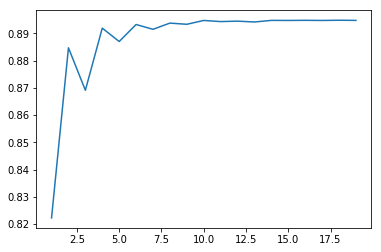

In [78]:
plt.plot(k_range, k_scores)

## SET UP CROSS VAL SCORE

In [79]:
model_scores = {}

In [80]:
def model_cross_val_scores(model, model_name, x_train, y_train, x_test, y_test):
    acc_scores = np.zeros((5,1))
    prec_scores = np.zeros((5,1))
    rec_scores = np.zeros((5,1))
    f1_scores = np.zeros((5,1))

    count = 0
    for train_ind, val_ind in kf.split(x_train, y_train):
        model.fit(x_train.iloc[train_ind,:],y_train.iloc[train_ind])
        pred = model.predict(x_train.iloc[val_ind,:])
        acc_scores[count]=(metrics.accuracy_score(y_train.iloc[val_ind],pred))
        prec_scores[count]=(metrics.precision_score(y_train.iloc[val_ind],pred))#,average=None))
        rec_scores[count]=(metrics.recall_score(y_train.iloc[val_ind],pred))#,average=None))
        f1_scores[count]=(metrics.f1_score(y_train.iloc[val_ind],pred))#,average=None))
        count+=1
    
    acc_avg = acc_scores.mean()
    prec_avg = prec_scores.mean(axis=0)
    rec_avg = rec_scores.mean(axis=0)
    f1_avg = f1_scores.mean(axis=0)
    
    model_scores[model_name] = {"accuracy": acc_avg, "precision": prec_avg, "recall": rec_avg, "f1" : f1_avg}

In [169]:
def model_cross_val_scores_oversample(model, model_name, x_train, y_train, x_test, y_test):
    acc_scores = np.zeros((5,1))
    prec_scores = np.zeros((5,1))
    rec_scores = np.zeros((5,1))
    f1_scores = np.zeros((5,1))

    count = 0
    for train_ind, val_ind in kf.split(x_train, y_train):
        n_pos = np.sum(Y_train.iloc[train_ind] == 1)
        n_neg = np.sum(Y_train.iloc[train_ind] == 0)
        ratio = {1 : n_pos * 8, 0 : n_neg} 

        # randomly oversample positive samples 
        ROS = imblearn.over_sampling.RandomOverSampler(ratio = ratio, random_state=42)
        
        
        X_tr_rs, Y_tr_rs = ROS.fit_sample(x_train.iloc[train_ind,:], y_train.iloc[train_ind])
        model.fit(X_tr_rs,Y_tr_rs)
        pred = model.predict(x_train.iloc[val_ind,:])
        acc_scores[count]=(metrics.accuracy_score(y_train.iloc[val_ind],pred))
        prec_scores[count]=(metrics.precision_score(y_train.iloc[val_ind],pred))#,average=None))
        rec_scores[count]=(metrics.recall_score(y_train.iloc[val_ind],pred))#,average=None))
        f1_scores[count]=(metrics.f1_score(y_train.iloc[val_ind],pred))#,average=None))
        count+=1
    
    acc_avg = acc_scores.mean()
    prec_avg = prec_scores.mean(axis=0)
    rec_avg = rec_scores.mean(axis=0)
    f1_avg = f1_scores.mean(axis=0)
    
    model_scores[model_name] = {"accuracy": acc_avg, "precision": prec_avg, "recall": rec_avg, "f1" : f1_avg}

## LOGISTIC REGRESSION

In [81]:
model_cross_val_scores(LogisticRegression(),"LogReg",X_train, Y_train, X_test, Y_test)

/Users/elizabethoriordan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/elizabethoriordan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/elizabethoriordan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/elizabethoriordan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/elizabethoriordan/anaconda3/lib/python3.6/sit

In [82]:
model_scores

{'LogReg': {'accuracy': 0.8948567641901333,
  'f1': array([0.]),
  'precision': array([0.]),
  'recall': array([0.])}}

## DECISION TREE

In [83]:
model_cross_val_scores(tree.DecisionTreeClassifier(min_samples_split=10, max_depth=15, min_samples_leaf=8, random_state = 100), "DT", X_train,Y_train, X_test, Y_test) 



In [84]:
model_scores

{'DT': {'accuracy': 0.8770128350290445,
  'f1': array([0.08185082]),
  'precision': array([0.18893357]),
  'recall': array([0.05234869])},
 'LogReg': {'accuracy': 0.8948567641901333,
  'f1': array([0.]),
  'precision': array([0.]),
  'recall': array([0.])}}

The decision tree did better than the KNN and Logistic Regression.

In [85]:
#try decision try with more depth
model_cross_val_scores(tree.DecisionTreeClassifier(min_samples_split=10, max_depth=20, min_samples_leaf=8, random_state = 100), "DT - more depth", X_train,Y_train, X_test, Y_test) 


In [86]:
model_scores

{'DT': {'accuracy': 0.8770128350290445,
  'f1': array([0.08185082]),
  'precision': array([0.18893357]),
  'recall': array([0.05234869])},
 'DT - more depth': {'accuracy': 0.8707662220114584,
  'f1': array([0.1056356]),
  'precision': array([0.19327937]),
  'recall': array([0.07272041])},
 'LogReg': {'accuracy': 0.8948567641901333,
  'f1': array([0.]),
  'precision': array([0.]),
  'recall': array([0.])}}

The added depth improves the F1 score.

## DECISION TREE W/ OVERSAMPLING

In [87]:
Y_train.mean()

0.10514323750032001

In [89]:
X_tr_rs = pd.DataFrame(X_tr_rs, columns = X_train.columns)
Y_tr_rs = pd.DataFrame(Y_tr_rs)

In [155]:
model_cross_val_scores_oversample(tree.DecisionTreeClassifier(min_samples_split=10, max_depth=20, min_samples_leaf=8, random_state = 100), "DT_oversample", X_train,Y_train, X_test, Y_test) 



In [369]:
model_cross_val_scores_oversample(tree.DecisionTreeClassifier(min_samples_split=10, max_depth=8, min_samples_leaf=8, random_state = 100), "DT_oversample_less_depth", X_train5,Y_train, X_test, Y_test) 



By using over sampling, the model improves quite a bit, especially the recall. When oversampling, it is better to use a smaller maximum depth.

In [370]:
model_scores


{'DT': {'accuracy': 0.8770128350290445,
  'f1': array([0.08185082]),
  'precision': array([0.18893357]),
  'recall': array([0.05234869])},
 'DT - more depth': {'accuracy': 0.8707662220114584,
  'f1': array([0.1056356]),
  'precision': array([0.19327937]),
  'recall': array([0.07272041])},
 'DT_oversample': {'accuracy': 0.7194136900379184,
  'f1': array([0.20937666]),
  'precision': array([0.14889936]),
  'recall': array([0.35367569])},
 'DT_oversample_less_depth': {'accuracy': 0.6134511329830958,
  'f1': array([0.23325987]),
  'precision': array([0.14745772]),
  'recall': array([0.55951694])},
 'LogReg': {'accuracy': 0.8948567641901333,
  'f1': array([0.]),
  'precision': array([0.]),
  'recall': array([0.])},
 'RF': {'accuracy': 0.8892501265991685,
  'f1': array([0.0521316]),
  'precision': array([0.26238396]),
  'recall': array([0.02900625])},
 'RF - 500 est.': {'accuracy': 0.7262230737970097,
  'f1': array([0.27201902]),
  'precision': array([0.18883635]),
  'recall': array([0.48669

In [267]:

# sorted(list(zip(X_train.columns,my_tree.feature_importances_)), key=lambda x: x[1])

In [303]:

from sklearn.externals.six import StringIO

#visualization
%matplotlib inline
import seaborn as sns
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz

In [427]:
dot_data = StringIO()  
export_graphviz(my_tree, out_file=dot_data,  
                    feature_names=X_train.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## RANDOM FOREST

In [311]:
model_cross_val_scores(RandomForestClassifier(n_estimators = 100),"RF", X_train, Y_train, X_test, Y_test)


In [312]:
model_scores

{'DT': {'accuracy': 0.8770128350290445,
  'f1': array([0.08185082]),
  'precision': array([0.18893357]),
  'recall': array([0.05234869])},
 'DT - more depth': {'accuracy': 0.8707662220114584,
  'f1': array([0.1056356]),
  'precision': array([0.19327937]),
  'recall': array([0.07272041])},
 'DT_oversample': {'accuracy': 0.7194136900379184,
  'f1': array([0.20937666]),
  'precision': array([0.14889936]),
  'recall': array([0.35367569])},
 'DT_oversample_less_depth': {'accuracy': 0.5823718120749949,
  'f1': array([0.23834094]),
  'precision': array([0.14784871]),
  'recall': array([0.62109587])},
 'LogReg': {'accuracy': 0.8948567641901333,
  'f1': array([0.]),
  'precision': array([0.]),
  'recall': array([0.])},
 'RF': {'accuracy': 0.8892501265991685,
  'f1': array([0.0521316]),
  'precision': array([0.26238396]),
  'recall': array([0.02900625])},
 'RF - 500 est.': {'accuracy': 0.8900693659241241,
  'f1': array([0.05673306]),
  'precision': array([0.29398688]),
  'recall': array([0.03146

In [313]:
#increase # estimators and use oversample, max depth limit
model_cross_val_scores_oversample(RandomForestClassifier(n_estimators = 500, max_depth = 10),"RF - 500 est.", X_train, Y_train, X_test, Y_test)

In [314]:
model_scores

{'DT': {'accuracy': 0.8770128350290445,
  'f1': array([0.08185082]),
  'precision': array([0.18893357]),
  'recall': array([0.05234869])},
 'DT - more depth': {'accuracy': 0.8707662220114584,
  'f1': array([0.1056356]),
  'precision': array([0.19327937]),
  'recall': array([0.07272041])},
 'DT_oversample': {'accuracy': 0.7194136900379184,
  'f1': array([0.20937666]),
  'precision': array([0.14889936]),
  'recall': array([0.35367569])},
 'DT_oversample_less_depth': {'accuracy': 0.5823718120749949,
  'f1': array([0.23834094]),
  'precision': array([0.14784871]),
  'recall': array([0.62109587])},
 'LogReg': {'accuracy': 0.8948567641901333,
  'f1': array([0.]),
  'precision': array([0.]),
  'recall': array([0.])},
 'RF': {'accuracy': 0.8892501265991685,
  'f1': array([0.0521316]),
  'precision': array([0.26238396]),
  'recall': array([0.02900625])},
 'RF - 500 est.': {'accuracy': 0.7262230737970097,
  'f1': array([0.27201902]),
  'precision': array([0.18883635]),
  'recall': array([0.48669

In [371]:
#random forest w/ over-sampling
model_cross_val_scores_oversample(RandomForestClassifier(n_estimators = 500, max_depth = 8),"RF_oversample", X_train5, Y_train, X_test, Y_test)


In [410]:
model_scores


{'DT': {'accuracy': 0.8770128350290445,
  'f1': array([0.08185082]),
  'precision': array([0.18893357]),
  'recall': array([0.05234869])},
 'DT - more depth': {'accuracy': 0.8707662220114584,
  'f1': array([0.1056356]),
  'precision': array([0.19327937]),
  'recall': array([0.07272041])},
 'DT_oversample': {'accuracy': 0.7194136900379184,
  'f1': array([0.20937666]),
  'precision': array([0.14889936]),
  'recall': array([0.35367569])},
 'DT_oversample_less_depth': {'accuracy': 0.6134511329830958,
  'f1': array([0.23325987]),
  'precision': array([0.14745772]),
  'recall': array([0.55951694])},
 'LogReg': {'accuracy': 0.8948567641901333,
  'f1': array([0.]),
  'precision': array([0.]),
  'recall': array([0.])},
 'RF': {'accuracy': 0.8892501265991685,
  'f1': array([0.0521316]),
  'precision': array([0.26238396]),
  'recall': array([0.02900625])},
 'RF - 500 est.': {'accuracy': 0.7262230737970097,
  'f1': array([0.27201902]),
  'precision': array([0.18883635]),
  'recall': array([0.48669

In [485]:
rf = RandomForestClassifier(n_estimators = 500,min_samples_split=10, min_samples_leaf=8,max_depth = 8)
rf.fit(X_tr_rs, Y_tr_rs)
pred2 = rf.predict(X_test5)
print(metrics.precision_score(Y_test, pred2))
print(metrics.recall_score(Y_test, pred2))
print(metrics.f1_score(Y_test, pred2))
print(metrics.confusion_matrix(Y_test, pred2))

0.15995189416716776
0.5559038662486938
0.24842400186784966
[[6015 2794]
 [ 425  532]]


In [338]:
X_train.columns

Index(['rating', 'review_count', 'INSPECTION_MONTH', 'INSPECTION_YEAR',
       'PRICE_NUM', 'BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS',
       'STATEN ISLAND', 'Perc_$25K', 'Perc_$50K', 'Perc_$75K', 'Perc_$100K',
       'Perc_$200K', 'Perc_+$200K', 'CHAIN', 'DAY', 'RICH', 'POOR',
       'BAD_SCORE', 'RAT_INSPEC', 'Perc_Total', 'CUISINE_FREQ'],
      dtype='object')

In [482]:
X_train5 = X_train[['rating', 'review_count', 'INSPECTION_MONTH', 'INSPECTION_YEAR',
       'PRICE_NUM', 'BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS',
       'STATEN ISLAND', 'Perc_$25K', 'Perc_$50K', 'Perc_$75K', 'Perc_$100K',
       'Perc_$200K', 'Perc_+$200K', 'CHAIN', 'DAY', 'RICH', 'POOR',
 'RAT_INSPEC', 'Perc_Total', "CUISINE_FREQ"]]

In [483]:
X_test5 = X_test[['rating', 'review_count', 'INSPECTION_MONTH', 'INSPECTION_YEAR',
       'PRICE_NUM', 'BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS',
       'STATEN ISLAND', 'Perc_$25K', 'Perc_$50K', 'Perc_$75K', 'Perc_$100K',
       'Perc_$200K', 'Perc_+$200K', 'CHAIN', 'DAY', 'RICH', 'POOR',
 'RAT_INSPEC', 'Perc_Total', "CUISINE_FREQ"]]

In [484]:
n_pos = np.sum(Y_train == 1)
n_neg = np.sum(Y_train == 0)
ratio = {1 : n_pos * 8, 0 : n_neg} 

        # randomly oversample positive samples 
ROS = imblearn.over_sampling.RandomOverSampler(ratio = ratio, random_state=42)
        
X_tr_rs, Y_tr_rs = ROS.fit_sample(X_train5, Y_train)

In [486]:
importances = rf.feature_importances_
importances2 = my_tree.feature_importances_

In [487]:
feat_import = list(zip(X_train5.columns, importances))

sorted(feat_import, key=lambda x: x[1])

[('RICH', 0.0017935958107885867),
 ('STATEN ISLAND', 0.0020631766035174534),
 ('BROOKLYN', 0.003740627628040951),
 ('BRONX', 0.004091429876736341),
 ('POOR', 0.005136224115206084),
 ('MANHATTAN', 0.0054144077571632665),
 ('QUEENS', 0.007035002583275617),
 ('DAY', 0.009446129248616103),
 ('INSPECTION_YEAR', 0.019704134310506893),
 ('PRICE_NUM', 0.02859056529511123),
 ('Perc_+$200K', 0.03530196476146979),
 ('Perc_$75K', 0.03876901229785266),
 ('Perc_$50K', 0.03977785990929055),
 ('Perc_$200K', 0.0403441414852425),
 ('Perc_$25K', 0.04970045573338064),
 ('RAT_INSPEC', 0.04995220218906841),
 ('Perc_$100K', 0.05346372294244693),
 ('rating', 0.06632296487178814),
 ('CUISINE_FREQ', 0.07294681748000349),
 ('review_count', 0.07374870841160193),
 ('INSPECTION_MONTH', 0.08918573926000348),
 ('Perc_Total', 0.1389166275079582),
 ('CHAIN', 0.16455448992093052)]

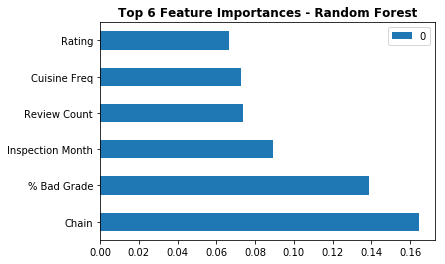

In [488]:
feats = [0.16455448992093052,0.1389166275079582,0.08918573926000348,0.07374870841160193,0.07294681748000349,0.06632296487178814]
feat_names = ["Chain", "% Bad Grade","Inspection Month", "Review Count", "Cuisine Freq", "Rating"]
plt.figure(figsize=(10,5))
pd.DataFrame(feats, feat_names).plot(kind="barh")
# plt.barh(feat_names, feats)
plt.title("Top 6 Feature Importances - Random Forest", weight="bold");


In [489]:
probs = rf.predict_proba(X_test5)
prob_pred = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, prob_pred)
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.6669351059101354

Text(0,0.5,'TPR')

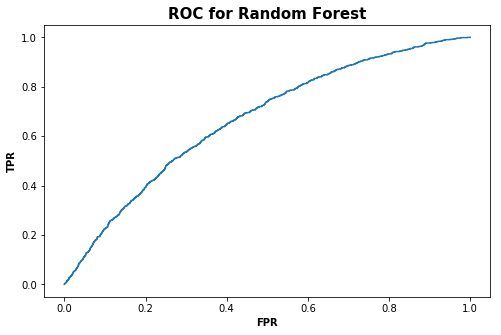

In [490]:
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr)
plt.title("ROC for Random Forest", weight="bold", size=15)
plt.xlabel("FPR", weight="bold")
plt.ylabel("TPR", weight="bold")

In [550]:
threshold = 0.45
predicted_proba = rf.predict_proba(X_test5)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

accuracy = accuracy_score(Y_test, predicted)

In [551]:
accuracy 

0.519352856850297

In [552]:
recall_score(Y_test, predicted) 

0.7471264367816092

In [553]:
precision_score(Y_test, predicted) 

0.1383781691503774

In [554]:
metrics.f1_score(Y_test, predicted) #

0.23350751143043766

In [555]:
metrics.confusion_matrix(Y_test, predicted)


array([[4357, 4452],
       [ 242,  715]])

## GRADIENT BOOSTING

In [356]:
X_train4 = X_train[["rating", "review_count", "INSPECTION_MONTH", "INSPECTION_YEAR","PRICE_NUM", "CHAIN", "Perc_Total"]]

In [359]:
X_test4 = X_test[["rating", "review_count", "INSPECTION_MONTH", "INSPECTION_YEAR","PRICE_NUM", "CHAIN", "Perc_Total"]]

In [362]:
X_train3, X_val, Y_train3, Y_val = train_test_split(X_train2,Y_train,test_size=0.2,random_state=100)

In [412]:
X_train3, X_val, Y_train3, Y_val = train_test_split(X_train5,Y_train,test_size=0.2,random_state=100)

In [355]:
X_train3.columns

Index(['rating', 'review_count', 'INSPECTION_MONTH', 'INSPECTION_YEAR',
       'PRICE_NUM', 'Perc_$25K', 'Perc_$50K', 'Perc_$75K', 'Perc_$100K',
       'Perc_$200K', 'Perc_+$200K', 'CHAIN', 'DAY', 'BAD_SCORE', 'RAT_INSPEC',
       'Perc_Total'],
      dtype='object')

In [413]:
gbm = xgb.XGBClassifier( 
                        n_estimators=30000,
                        max_depth=3,
                        objective='binary:logistic', #new objective
                        learning_rate=.25, 
                        subsample=.9,
                        min_child_weight=1,
                        colsample_bytree=.8,
                        scale_pos_weight = 9
                       )

eval_set=[(X_train3,Y_train3),(X_val,Y_val)]
fit_model = gbm.fit( 
                    X_train3, Y_train3, 
                    eval_set=eval_set,
                    eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=50,
                    verbose=False
                   )

metrics.f1_score(Y_test, gbm.predict(X_test5, ntree_limit=gbm.best_ntree_limit))

0.2540377771694498

In [414]:
metrics.recall_score(Y_test, gbm.predict(X_test5, ntree_limit=gbm.best_ntree_limit))

0.48484848484848486

In [415]:
metrics.precision_score(Y_test, gbm.predict(X_test5, ntree_limit=gbm.best_ntree_limit))

0.17210682492581603

In [411]:
list(zip(X_train.columns,gbm.feature_importances_))

[('rating', 0.058688387),
 ('review_count', 0.22901003),
 ('INSPECTION_MONTH', 0.08479532),
 ('INSPECTION_YEAR', 0.019632414),
 ('PRICE_NUM', 0.031223893),
 ('BRONX', 0.0028195488),
 ('BROOKLYN', 0.0033416876),
 ('MANHATTAN', 0.0021929825),
 ('QUEENS', 0.004281537),
 ('STATEN ISLAND', 0.003968254),
 ('Perc_$25K', 0.03978697),
 ('Perc_$50K', 0.041875523),
 ('Perc_$75K', 0.061925646),
 ('Perc_$100K', 0.047410194),
 ('Perc_$200K', 0.04145781),
 ('Perc_+$200K', 0.041875523),
 ('CHAIN', 0.010547201),
 ('DAY', 0.012844612),
 ('RICH', 0.00020885548),
 ('POOR', 0.0003132832),
 ('BAD_SCORE', 0.07007101),
 ('RAT_INSPEC', 0.10797828),
 ('Perc_Total', 0.083751045)]

In [366]:
metrics.recall_score(Y_test, gbm.predict(X_test5, ntree_limit=gbm.best_ntree_limit))

0.48484848484848486

In [367]:
precision_score(Y_test, gbm.predict(X_test5, ntree_limit=gbm.best_ntree_limit))

0.17210682492581603

In [368]:
probs = gbm.predict_proba(X_test5)
prob_pred = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, prob_pred)
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.6560136143653784

In [217]:
threshold = 0.35
predicted_proba = gbm.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

accuracy = accuracy_score(Y_test, predicted)

In [218]:
recall_score(Y_test, predicted)

0.7168234064785789

In [219]:
accuracy

0.5300020479213599

In [220]:
precision_score(Y_test, predicted)

0.13706293706293707

In [221]:
metrics.confusion_matrix(Y_test, predicted)

array([[4490, 4319],
       [ 271,  686]])

In [130]:
model_scores

{'DT': {'accuracy': 0.8770778334671526,
  'f1': array([0.07757253]),
  'precision': array([0.18651073]),
  'recall': array([0.04920614])},
 'DT - more depth': {'accuracy': 0.8728788539772335,
  'f1': array([0.09415035]),
  'precision': array([0.19004348]),
  'recall': array([0.06262304])},
 'DT_oversample': {'accuracy': 0.7916615255550112,
  'f1': array([0.79792866]),
  'precision': array([0.75448825]),
  'recall': array([0.84681579])},
 'GB': {'accuracy': 0.894395672455591,
  'f1': array([0.]),
  'precision': array([0.]),
  'recall': array([0.])},
 'LogReg': {'accuracy': 0.894395672455591,
  'f1': array([0.]),
  'precision': array([0.]),
  'recall': array([0.])},
 'RF': {'accuracy': 0.8877818097112335,
  'f1': array([0.07994774]),
  'precision': array([0.29630062]),
  'recall': array([0.04633608])},
 'RF - 1000 est.': {'accuracy': 0.8884562169706263,
  'f1': array([0.08090087]),
  'precision': array([0.31350567]),
  'recall': array([0.04669495])},
 'RF_oversample': {'accuracy': 0.9690

In [226]:
df.to_csv("10.30.18.csv")